In [1]:

import pandas as pd
# Load the newly uploaded CSV file to understand its structure
file_path_new = 'C:/Users/Public/housing.csv'
housing_data = pd.read_csv(file_path_new)

# Display the first few rows of the dataset
housing_data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Data Preprocessing:

In [2]:
# Handle missing values
housing_data['total_bedrooms'].fillna(housing_data['total_bedrooms'].median(), inplace=True)

# One-hot encode the ocean proximity column
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])


### Train-Test Split:

In [3]:
from sklearn.model_selection import train_test_split

X = housing_data.drop('median_house_value', axis=1)
y = housing_data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Model Selection and Training:

In [4]:
from sklearn.ensemble import RandomForestRegressor

# Train a random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

### Evaluate the Model:

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 2398820115.3845725
R² Score: 0.8169411111174801


# Project 2: Housing Price Classification
Instead of predicting the exact house price, you can classify the houses into different price categories (e.g., low, medium, high).

## 1. Create Price Categories:

Create bins for the median_house_value to classify houses into low, medium, and high price categories.

In [6]:
housing_data['price_category'] = pd.cut(housing_data['median_house_value'], bins=[0, 150000, 300000, 500001], labels=['low', 'medium', 'high'])


## 2. Train a Classification Model:

Train a classifier (like Random Forest Classifier, Logistic Regression, or SVM) to predict the price category.

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Prepare features and target
X = housing_data.drop('price_category', axis=1)
y = housing_data['price_category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## 3. Evaluate the Model:

Use accuracy and F1 score to evaluate the classification model.

In [8]:
from sklearn.metrics import accuracy_score, f1_score

y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")


Accuracy: 0.9997577519379846
F1 Score: 0.9997577593218993


# Project 3: Exploratory Data Analysis (EDA)
Perform an in-depth analysis of the dataset to understand housing trends in California. You can visualize correlations between house prices and features like location, house age, and proximity to the ocean.

## 1. Correlation Analysis:

Use a heatmap to visualize correlations between variables.

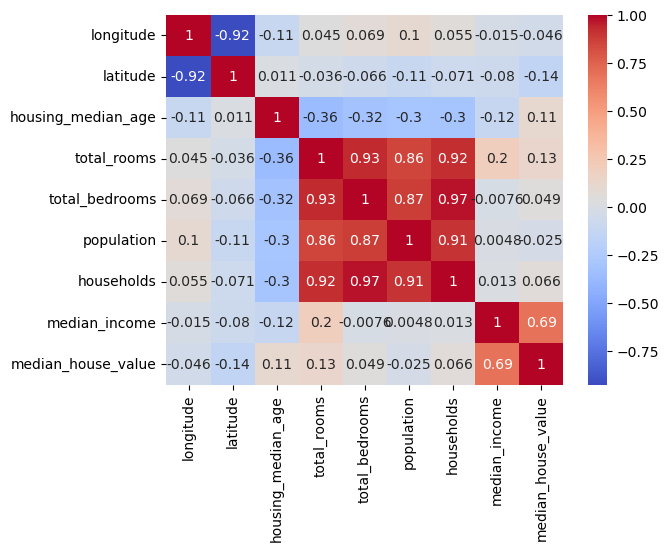

In [9]:
# Select only numeric columns
numeric_columns = housing_data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_columns.corr()

# Plot the correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


## 2. Geographical Analysis:

Plot house prices based on latitude and longitude using scatter plots.

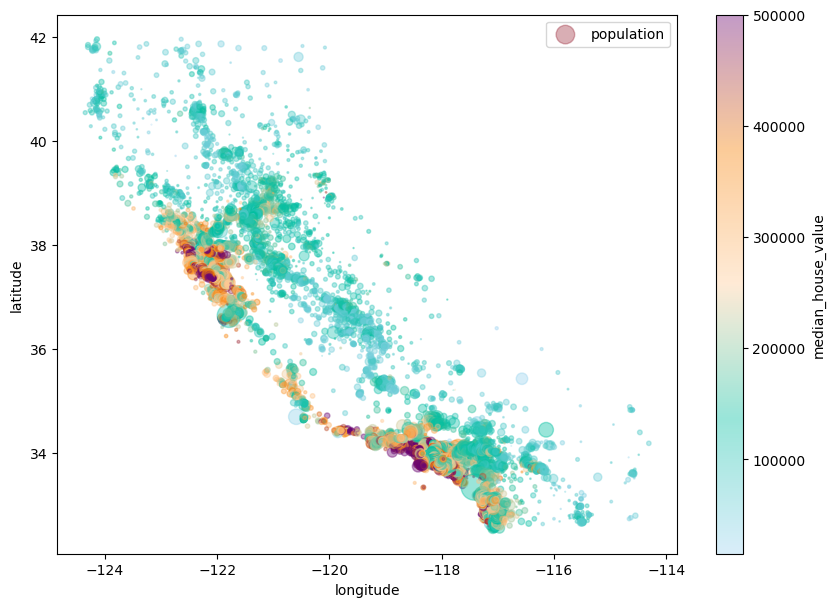

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define the custom colormap using the same mixed vibrant colors
custom_cmap = mcolors.LinearSegmentedColormap.from_list(
    "custom_cmap", ["#a2d5f2", "#00bfa0", "#ffcc99", "#f77f00", "#6a0572"])

# Create the scatter plot with the custom colormap
housing_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
                  s=housing_data["population"]/100, label="population", figsize=(10, 7),
                  c="median_house_value", cmap=custom_cmap, colorbar=True)

# Display the scatter plot
plt.show()
